# Notebook to Create the `Job Completion Time` CSV File

In [1]:
import pandas as pd
from pathlib import Path

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
# "GOOG_sub_trace_10k_4_25"
# "GOOG_sub_trace_50k_10GM_50LM"
# "New_GOOG_sub_trace_50k_10GM_50LM"
# "New_GOOG_sub_trace_50k_4GM_25LM"
BASE_FILE_PATH = Path("New_GOOG_sub_trace_50k_1GM_1LM")
# "sparrow_GOOG_subtrace_50_000.csv"
SPARROW_CSV_FILE_NAME = "sparrow_modified_GOOG_50_000.csv"
MEGHA_CSV_FILE_NAME = "record-2022-01-06-18-02-54_jobs_info.csv"
IS_YAHOO_TRACE = False


NETWORK_DELAY = 0.0005

# Loading the Sparrow CSV File

In [3]:
SPARROW_CSV_FILE_COLUMN_NAME_LIST = ["Job ID", "Task ID", "Job Arrival Time",
                                     "Task Launch Time", "Task Duration (Trace)",
                                     "Task End Time On Node"]

In [4]:
SPARROW_CSV_FILE_PATH = BASE_FILE_PATH / Path(SPARROW_CSV_FILE_NAME)

sparrow_df = pd.read_csv(SPARROW_CSV_FILE_PATH,
                         names=SPARROW_CSV_FILE_COLUMN_NAME_LIST
                        )
sparrow_df["Task End Time On Node (Derived)"] = sparrow_df["Task Launch Time"] + sparrow_df["Task Duration (Trace)"]

sparrow_df["Task End Time On Node"] = sparrow_df["Task Launch Time"] + sparrow_df["Task Duration (Trace)"]

sparrow_df

,Job ID,Task ID,Job Arrival Time,Task Launch Time,Task Duration (Trace),Task End Time On Node,Task End Time On Node (Derived)
0,1,0,281294.20,281294.2015,79782,361076.2015,361076.2015
1,1,1,281294.20,281294.2015,80279,361573.2015,361573.2015
2,1,2,281294.20,281294.2015,78543,359837.2015,359837.2015
3,1,3,281294.20,281294.2015,79460,360754.2015,360754.2015
4,1,4,281294.20,281294.2015,84355,365649.2015,365649.2015
...,...,...,...,...,...,...,...
312553,5654,0,298605.86,311972.6045,67,312039.6045,312039.6045
312554,5356,0,298509.40,312296.6115,112,312408.6115,312408.6115
312555,6873,0,298984.06,314737.0105,513,315250.0105,315250.0105
312556,2502,0,296652.65,341307.2045,297,341604.2045,341604.2045


In [5]:
# assert sparrow_df['Task End Time On Node'].equals(sparrow_df['Task End Time On Node (Derived)'])

In [6]:
sparrow_df.dtypes

Job ID                               int64
Task ID                              int64
Job Arrival Time                   float64
Task Launch Time                   float64
Task Duration (Trace)                int64
Task End Time On Node              float64
Task End Time On Node (Derived)    float64
dtype: object

# Loading the Megha CSV File

In [7]:
MEGHA_CSV_FILE_PATH = BASE_FILE_PATH / Path(MEGHA_CSV_FILE_NAME)
megha_df = pd.read_csv(MEGHA_CSV_FILE_PATH)

# ONLY FOR THE YAHOO TRACE
if IS_YAHOO_TRACE:
    megha_df["Task End Time On Node"] = megha_df["Task End Time On Node"] + NETWORK_DELAY
    megha_df["Task Launch Time"] = megha_df["Task Launch Time"] + NETWORK_DELAY

megha_df

,Job ID,Task ID,Job Arrival Time,Task Launch Time,Task Duration (Trace),Task Duration (GM),Task Queuing Delay,Task End Time On Node
0,1,1,281294.20,281294.201,79782,79782.0015,0.001,361076.2015
1,1,2,281294.20,281294.201,80279,80279.0015,0.001,361573.2015
2,1,3,281294.20,281294.201,78543,78543.0015,0.001,359837.2015
3,1,4,281294.20,281294.201,79460,79460.0015,0.001,360754.2015
4,1,5,281294.20,281294.201,84355,84355.0015,0.001,365649.2015
...,...,...,...,...,...,...,...,...
312553,9997,17,299997.93,299997.931,53,53.0015,0.001,300050.9315
312554,9997,18,299997.93,299997.931,43,43.0015,0.001,300040.9315
312555,9998,1,299997.94,299997.941,186,186.0015,0.001,300183.9415
312556,9999,1,299997.95,299997.951,187,187.0015,0.001,300184.9515


In [8]:
megha_df.dtypes

Job ID                     int64
Task ID                    int64
Job Arrival Time         float64
Task Launch Time         float64
Task Duration (Trace)      int64
Task Duration (GM)       float64
Task Queuing Delay       float64
Task End Time On Node    float64
dtype: object

# Extracting Required Columns from the Megha Dataframe to create the Ideal Dataframe

In [9]:
ideal_df = megha_df[['Job ID', 'Task ID', 'Job Arrival Time', 'Task Duration (Trace)']].copy()
ideal_df["Task End Time On Node"] = ideal_df["Job Arrival Time"] + ideal_df["Task Duration (Trace)"]

ideal_df

,Job ID,Task ID,Job Arrival Time,Task Duration (Trace),Task End Time On Node
0,1,1,281294.20,79782,361076.20
1,1,2,281294.20,80279,361573.20
2,1,3,281294.20,78543,359837.20
3,1,4,281294.20,79460,360754.20
4,1,5,281294.20,84355,365649.20
...,...,...,...,...,...
312553,9997,17,299997.93,53,300050.93
312554,9997,18,299997.93,43,300040.93
312555,9998,1,299997.94,186,300183.94
312556,9999,1,299997.95,187,300184.95


In [10]:
ideal_df.dtypes

Job ID                     int64
Task ID                    int64
Job Arrival Time         float64
Task Duration (Trace)      int64
Task End Time On Node    float64
dtype: object

---

# Sparrow Job Completion Time

In [11]:
sparrow_job_completion_time_df = sparrow_df.groupby("Job ID").max("Task End Time On Node")

sparrow_job_completion_time_df

,Task ID,Job Arrival Time,Task Launch Time,Task Duration (Trace),Task End Time On Node,Task End Time On Node (Derived)
Job ID,,,,,,
1,44,281294.20,281294.2015,86237,367531.2015,367531.2015
2,7,284907.60,284907.6015,71316,356223.6015,356223.6015
3,0,286600.60,286600.6015,43975,330575.6015,330575.6015
4,3,286773.60,286773.6015,56642,343415.6015,343415.6015
5,0,288147.40,288147.4015,47038,335185.4015,335185.4015
...,...,...,...,...,...,...
9996,0,299997.92,307076.2135,201,307277.2135,307277.2135
9997,17,299997.93,300943.2125,164,300986.2125,300986.2125
9998,0,299997.94,301384.4105,186,301570.4105,301570.4105


# Megha Job Completion Time

In [12]:
megha_job_completion_time_df = megha_df.groupby("Job ID").max("Task End Time On Node")

megha_job_completion_time_df

,Task ID,Job Arrival Time,Task Launch Time,Task Duration (Trace),Task Duration (GM),Task Queuing Delay,Task End Time On Node
Job ID,,,,,,,
1,45,281294.20,281294.201,86237,86237.0015,0.001,367531.2015
2,8,284907.60,284907.601,71316,71316.0015,0.001,356223.6015
3,1,286600.60,286600.601,43975,43975.0015,0.001,330575.6015
4,4,286773.60,286773.601,56642,56642.0015,0.001,343415.6015
5,1,288147.40,288147.401,47038,47038.0015,0.001,335185.4015
...,...,...,...,...,...,...,...
9996,1,299997.92,299997.921,201,201.0015,0.001,300198.9215
9997,18,299997.93,299997.931,164,164.0015,0.001,300161.9315
9998,1,299997.94,299997.941,186,186.0015,0.001,300183.9415


# Ideal Job Completion Time

In [13]:
ideal_job_completion_time_df = ideal_df.groupby("Job ID").max("Task End Time On Node")

ideal_job_completion_time_df

,Task ID,Job Arrival Time,Task Duration (Trace),Task End Time On Node
Job ID,,,,
1,45,281294.20,86237,367531.20
2,8,284907.60,71316,356223.60
3,1,286600.60,43975,330575.60
4,4,286773.60,56642,343415.60
5,1,288147.40,47038,335185.40
...,...,...,...,...
9996,1,299997.92,201,300198.92
9997,18,299997.93,164,300161.93
9998,1,299997.94,186,300183.94


---

In [14]:
data = [megha_job_completion_time_df["Task End Time On Node"],
        sparrow_job_completion_time_df["Task End Time On Node"],
        ideal_job_completion_time_df["Task End Time On Node"],
       ]

headers = ["Megha Job Completion Time", "Sparrow Job Completion Time", "Ideal Job Completion Time"]

final_df = pd.concat(data, axis=1, keys=headers)

final_df

,Megha Job Completion Time,Sparrow Job Completion Time,Ideal Job Completion Time
Job ID,,,
1,367531.2015,367531.2015,367531.20
2,356223.6015,356223.6015,356223.60
3,330575.6015,330575.6015,330575.60
4,343415.6015,343415.6015,343415.60
5,335185.4015,335185.4015,335185.40
...,...,...,...
9996,300198.9215,307277.2135,300198.92
9997,300161.9315,300986.2125,300161.93
9998,300183.9415,301570.4105,300183.94


In [15]:
final_df.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
             9991,  9992,  9993,  9994,  9995,  9996,  9997,  9998,  9999,
            10000],
           dtype='int64', name='Job ID', length=10000)

Megha Job Completion Time


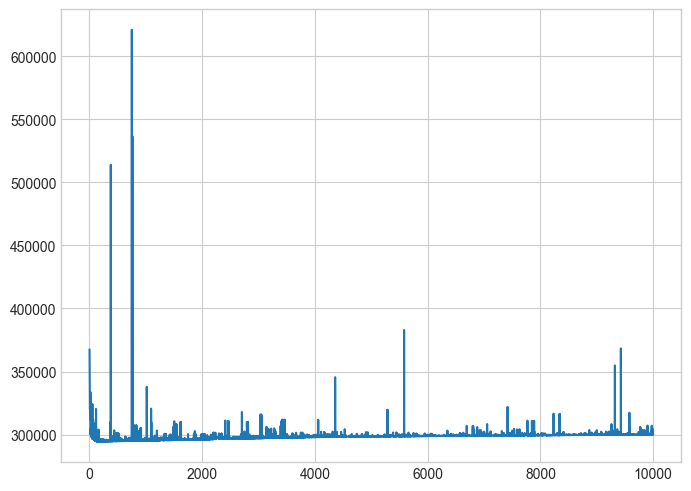

In [16]:
print("Megha Job Completion Time")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = plt.axes()

x = final_df.index  # Job ID
y = final_df["Megha Job Completion Time"]

ax.plot(x, y)
# plt.savefig('Megha_GOOG.pdf')

Sparrow Job Completion Time


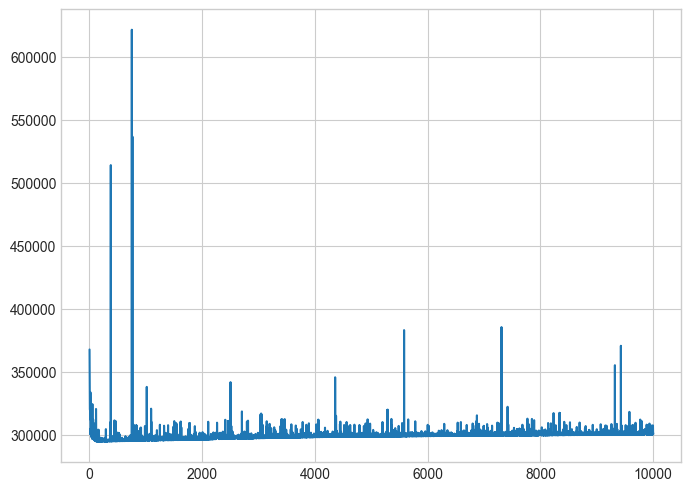

In [17]:
print("Sparrow Job Completion Time")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = plt.axes()

x = final_df.index  # Job ID
y = final_df["Sparrow Job Completion Time"]

ax.plot(x, y)

plt.show()

Ideal Job Completion Time


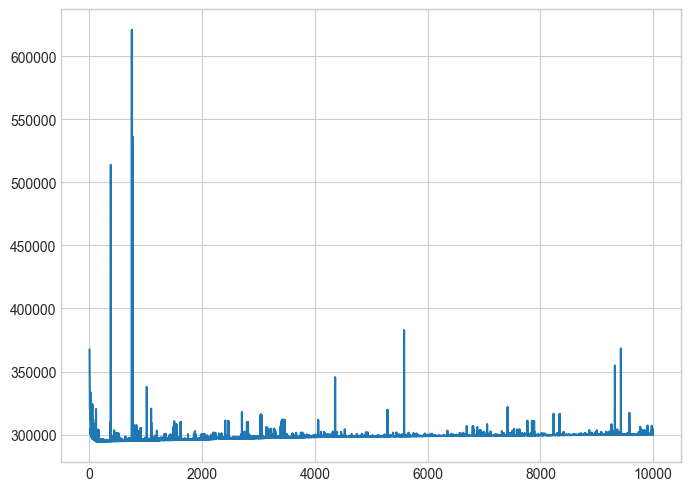

In [18]:
print("Ideal Job Completion Time")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = plt.axes()

x = final_df.index  # Job ID
y = final_df["Ideal Job Completion Time"]
ax.plot(x, y)

In [19]:
final_df.to_csv(BASE_FILE_PATH / Path("job_completion_times.csv"))

In [20]:
final_df["Megha Delay in Job Completion Time"] = final_df["Megha Job Completion Time"] - final_df["Ideal Job Completion Time"]
final_df["Sparrow Delay in Job Completion Time"] = final_df["Sparrow Job Completion Time"] - final_df["Ideal Job Completion Time"]

final_df

,Megha Job Completion Time,Sparrow Job Completion Time,Ideal Job Completion Time,Megha Delay in Job Completion Time,Sparrow Delay in Job Completion Time
Job ID,,,,,
1,367531.2015,367531.2015,367531.20,0.0015,0.0015
2,356223.6015,356223.6015,356223.60,0.0015,0.0015
3,330575.6015,330575.6015,330575.60,0.0015,0.0015
4,343415.6015,343415.6015,343415.60,0.0015,0.0015
5,335185.4015,335185.4015,335185.40,0.0015,0.0015
...,...,...,...,...,...
9996,300198.9215,307277.2135,300198.92,0.0015,7078.2935
9997,300161.9315,300986.2125,300161.93,0.0015,824.2825
9998,300183.9415,301570.4105,300183.94,0.0015,1386.4705


In [21]:
final_df["Megha Delay in Job Completion Time"].describe()

count    10000.000000
mean         0.061214
std          2.089291
min          0.001500
25%          0.001500
50%          0.001500
75%          0.001500
max        120.003500
Name: Megha Delay in Job Completion Time, dtype: float64

In [22]:
final_df["Sparrow Delay in Job Completion Time"].describe()

count    10000.000000
mean       622.594271
std       1490.027136
min          0.001500
25%          0.001500
50%        330.405000
75%        807.155750
max      86027.998500
Name: Sparrow Delay in Job Completion Time, dtype: float64

In [23]:
final_df.to_csv(BASE_FILE_PATH / Path("delay_in_job_completion_times.csv"))

---